In [19]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install scipy
!pip install numpy

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
student_data = pd.read_csv('student_data.csv')

In [48]:
X = student_data.drop(columns=['GPA', 'GradeClass', 'StudentID'])
y = student_data['GradeClass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.5897730605444366
R-squared: 0.6052793863124204


In [49]:
coefficients = lr_model.coef_
intercept = lr_model.intercept_
print(f"Intercept: {intercept}")
print("Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")

Intercept: 2.177890604218421
Coefficients:
Age: -0.00023384969645586217
Gender: 0.04140607504053412
Ethnicity: -0.02012886676060474
ParentalEducation: 0.017140946394428685
StudyTimeWeekly: -0.027886291875097516
Absences: 0.10594858929583599
Tutoring: -0.2698331543825018
ParentalSupport: -0.14044651825051274
Extracurricular: -0.19099441092894226
Sports: -0.1291438640084643
Music: -0.09559491710405382
Volunteering: 0.08943319218934331


In [50]:
y_train_pred = lr_model.predict(X_train)
rss = np.sum((y_train - y_train_pred) ** 2)
y_mean = np.mean(y_train)
ess = np.sum((y_train_pred - y_mean) ** 2)
loo = LeaveOneOut()
y_pred_loo = cross_val_predict(lr_model, X_train, y_train, cv=loo)
press = np.sum((y_train - y_pred_loo) ** 2)

print(f"RSS (Residual Sum of Squares): {rss}")
print(f"ESS (Explained Sum of Squares): {ess}")
print(f"PRESS (Predicted Residual Error Sum of Squares): {press}")

RSS (Residual Sum of Squares): 1219.8922446585457
ESS (Explained Sum of Squares): 1704.7266784987933
PRESS (Predicted Residual Error Sum of Squares): 1236.282760282147


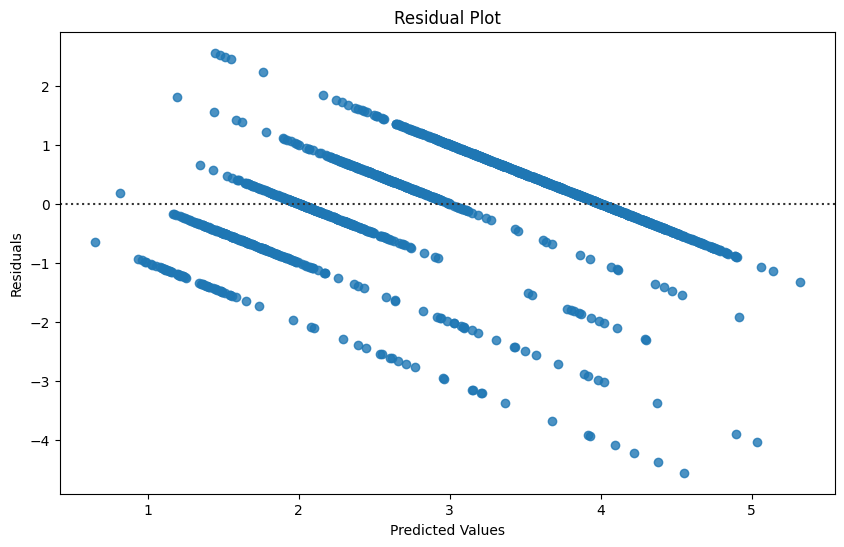

In [61]:
residuals = y_train - y_train_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_train_pred, y=residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()